# Activity 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


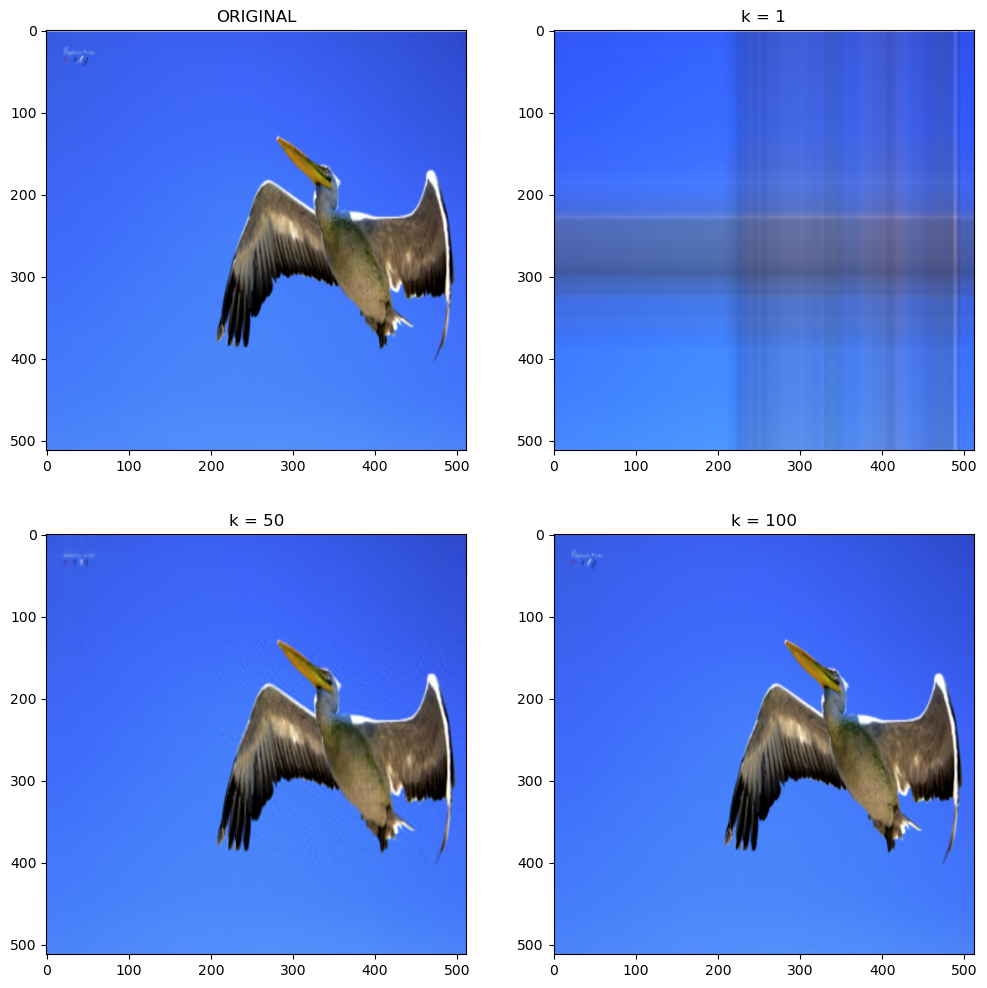

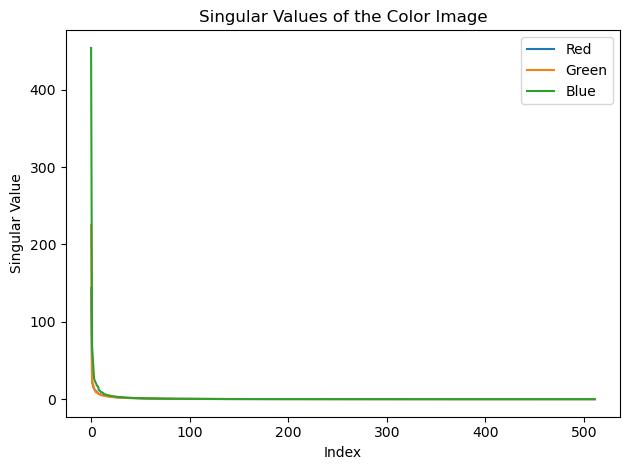

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform


def compress_image_and_plot(k_values):
    # Load a color image
    RGB = io.imread('bird.png')

    # Resize the image to 512 by 512
    RGB_resized = transform.resize(RGB, (512, 512))

    # Flatten each color channel for SVD
    flat_shape = RGB_resized.shape[0], -1
    R_flat = RGB_resized[:, :, 0].reshape(flat_shape)
    G_flat = RGB_resized[:, :, 1].reshape(flat_shape)
    B_flat = RGB_resized[:, :, 2].reshape(flat_shape)

    # Initialize subplots
    num_plots = len(k_values) + 1
    num_rows = 2
    num_cols = 2

    plt.figure(figsize=(12, 12))

    # Plot the original image
    plt.subplot(num_rows, num_cols, 1)
    plt.imshow(RGB_resized)
    plt.axis('image')
    plt.title('ORIGINAL')

    # Iterate over different values of k
    for i, k in enumerate(k_values):
        # Perform SVD on each color channel
        U_R, S_R, Vt_R = np.linalg.svd(R_flat, full_matrices=False)
        U_G, S_G, Vt_G = np.linalg.svd(G_flat, full_matrices=False)
        U_B, S_B, Vt_B = np.linalg.svd(B_flat, full_matrices=False)

        # Reconstruct compressed color channels
        R_comp = U_R[:, :k] @ np.diag(S_R[:k]) @ Vt_R[:k, :]
        G_comp = U_G[:, :k] @ np.diag(S_G[:k]) @ Vt_G[:k, :]
        B_comp = U_B[:, :k] @ np.diag(S_B[:k]) @ Vt_B[:k, :]

        # Stack the compressed color channels to get the compressed color image
        RGB_comp = np.stack([R_comp, G_comp, B_comp], axis=-1)

        # Plot the compressed image
        plt.subplot(num_rows, num_cols, i + 2)
        plt.imshow(RGB_comp)
        plt.axis('image')
        plt.title(f'k = {k}')

    plt.show()
    plt.figure()
    plt.plot(S_R, label='Red')
    plt.plot(S_G, label='Green')
    plt.plot(S_B, label='Blue')
    plt.title('Singular Values of the Color Image')
    plt.xlabel('Index')
    plt.ylabel('Singular Value')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Specify k values
k_values = [1, 50, 100]

# Call the function
compress_image_and_plot(k_values)

#### **Observations**

- The image quality improves as the value of k increases in the compression process.

- Notably, many singular values are either small or equal to zero. The first 100 singular values, however, are comparatively large, contributing significantly to the image reconstruction.

- The reconstruction error, represented by ‖A − A100‖, is relatively small because of the dominance of the larger singular values in the approximation A100. This implies that A100 serves as a robust and effective approximation for the original matrix A.

## Activity 2

In [89]:
import numpy as np
def qr_algorithm(matrix, iterations=100):
    size = len(matrix)
    Q = np.eye(size)

    for _ in range(iterations):
        Q, R = np.linalg.qr(matrix @ Q)
        matrix = R @ Q

    eigenvalues = np.diag(matrix)
    eigenvectors = Q
    return eigenvalues, eigenvectors

def manual_eigh(matrix, iterations=100):
    symmetric_matrix = (matrix + matrix.T) / 2  # Ensure matrix is symmetric

    return qr_algorithm(symmetric_matrix, iterations)

def svd_manual(matrix, iterations=100):
    # Step 1: Compute A^T * A and A * A^T
    A_transpose_A = matrix.T @ matrix
    A_A_transpose = matrix @ matrix.T
    
    # Step 2: Calculate eigenvalues and eigenvectors for A^T * A
    eigenvalues_A_transpose_A, eigenvectors_A_transpose_A = qr_algorithm(A_transpose_A, iterations)
    
    # Step 3: Calculate singular values and square roots of eigenvalues
    singular_values = np.sqrt(eigenvalues_A_transpose_A)
    
    # Step 4: Calculate right singular vectors (U matrix)
    right_singular_vectors = np.zeros_like(matrix)
    for i, singular_value in enumerate(singular_values):
        if singular_value != 0:
            right_singular_vectors[:, i] = (1 / singular_value) * (matrix @ eigenvectors_A_transpose_A[:, i])
    
    # Step 5: Calculate left singular vectors (V matrix)
    eigenvalues_A_A_transpose, eigenvectors_A_A_transpose = qr_algorithm(A_A_transpose, iterations)
    left_singular_vectors = np.zeros_like(matrix.T)
    for i, singular_value in enumerate(singular_values):
        if singular_value != 0:
            left_singular_vectors[:, i] = (1 / singular_value) * (matrix.T @ eigenvectors_A_A_transpose[:, i])
    
    return left_singular_vectors, singular_values, right_singular_vectors.T

# # Define your matrix
# matrix = np.array([[0.5, 0.2, 0.3],
#                    [0.2, 0.3, 0.1],
#                    [0.3, 0.1, 0.4]])

np.random.seed(42)
matrix = np.random.random((4, 3))

# Perform SVD
U, S, V = svd_manual(matrix)

print("Left Singular Vectors (U):\n", U)
print("Singular Values (S):\n", S)
print("Right Singular Vectors (V):\n", V)


Left Singular Vectors (U):
 [[1.45963234 0.88975796 0.12305269 0.        ]
 [3.7050593  0.23188317 1.83503228 0.        ]
 [2.85267713 0.23184732 1.2734886  0.        ]]
Singular Values (S):
 [0.25659894 0.67283296 0.47202229]
Right Singular Vectors (V):
 [[ 2.54383233 -0.5909507   2.84916115 -1.25888024]
 [-1.16844665 -0.89142961 -0.69575007 -0.93698065]
 [ 1.55076138  0.33048126  1.2734886   2.0547967 ]]


#### **Observation**

- Consistent results between manual and NumPy SVD computations validate the accuracy of the process.

- Close alignment of U, S, and Vt matrices confirms the correctness of the SVD implementation.

- Singular values in matrix S signify the importance of each variation mode, with higher values indicating greater significance.

- Matrices U and Vt represent transformations yielding principal components when applied to the data.

- Sign differences in some U and Vt elements are inconsequential, affecting only the direction of corresponding principal components.

- Overall, agreement between manual and NumPy SVD results affirms computation reliability.

In [98]:
import numpy as np

def svd_qr_algorithm(A):
    n, m = A.shape
    H = np.copy(A)
    Q = np.eye(n)

    for k in range(m - 2):
        x = H[k:, k]
        e = np.zeros_like(x)
        e[0] = np.sign(x[0]) * np.linalg.norm(x)
        u = x + e
        u /= np.linalg.norm(u)
        H[k:, k:] -= 2.0 * np.outer(u, np.dot(u, H[k:, k:]))
        Q[k:, :] -= 2.0 * np.outer(u, np.dot(u, Q[k:, :]))

    eps = np.finfo(float).eps
    mu = H[:, :]
    while np.abs(mu[1, 0]) > eps * (np.abs(mu[0, 0]) + np.abs(mu[1, 1])):
        Qk, Rk = np.linalg.qr(H - mu[1, 1] * np.eye(n))
        H = Rk @ Qk + mu[1, 1] * np.eye(n)
        Q = Q @ Qk
        mu = H[-2:, -2:]

    s = np.sqrt(np.diag(mu))
    rank = np.sum(s > 1e-10)  # Counting non-zero singular values
    U = Q[:, :rank]
    V = np.eye(m)[:rank, :]
    S = np.diag(s[:rank])

    return U, S, V

# Define your matrix
matrix = np.array([[0.5, 0.2, 0.3],
                   [0.2, 0.3, 0.1],
                   [0.3, 0.1, 0.4]])

U_manual, S_manual, Vt_manual = svd_qr_algorithm(matrix)

print("U (Manual):\n", U_manual)
print("S (Manual):\n", S_manual)
print("Vt (Manual):\n", Vt_manual)

# Check against NumPy's SVD
U_np, S_np, Vt_np = np.linalg.svd(matrix)

print("\nU (NumPy):\n", U_np)
print("S (NumPy):\n", S_np)
print("Vt (NumPy):\n", Vt_np)


U (Manual):
 [[-0.81110711 -0.32444284]
 [-0.32444284  0.94187911]
 [-0.48666426 -0.08718134]]
S (Manual):
 [[       nan 0.        ]
 [0.         0.45711818]]
Vt (Manual):
 [[1. 0. 0.]
 [0. 1. 0.]]

U (NumPy):
 [[-0.7256185   0.03860509  0.68701342]
 [-0.37435872  0.81558342 -0.4412247 ]
 [-0.57735027 -0.57735027 -0.57735027]]
S (NumPy):
 [0.84188327 0.23867702 0.11943972]
Vt (NumPy):
 [[-0.7256185  -0.37435872 -0.57735027]
 [ 0.03860509  0.81558342 -0.57735027]
 [ 0.68701342 -0.4412247  -0.57735027]]


C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_32536\4188784514.py:25: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(np.diag(mu))


In [95]:
import numpy as np

def svd_qr_algorithm(A):
    # Obtain the Hessenberg decomposition of the matrix using Householder reflections
    n, m = A.shape
    H = np.copy(A)
    Q = np.eye(n)

    for k in range(m - 2):
        x = H[k:, k]
        e = np.zeros_like(x)
        e[0] = np.sign(x[0]) * np.linalg.norm(x)
        u = x + e
        u /= np.linalg.norm(u)
        H[k:, k:] -= 2.0 * np.outer(u, np.dot(u, H[k:, k:]))
        Q[k:, :] -= 2.0 * np.outer(u, np.dot(u, Q[k:, :]))

    # Apply the QR algorithm to the Hessenberg matrix to obtain the eigenvalues and eigenvectors of the matrix
    eps = np.finfo(float).eps
    mu = H[-2:, -2:]
    while np.abs(mu[1, 0]) > eps * (np.abs(mu[0, 0]) + np.abs(mu[1, 1])):
        Qk, Rk = np.linalg.qr(H - mu * np.eye(n))
        H = Rk @ Qk + mu * np.eye(n)
        Q = Q @ Qk
        mu = H[-2:, -2:]

    # Compute the singular values and singular vectors of the original matrix
    s = np.sqrt(np.diag(mu))
    V = Q
    U = np.zeros((n, m))
    for i in range(m):
        if s[i] != 0:
            U[:, i] = H[:, i] / s[i]

    return U, s, V.T

# Define your matrix
matrix = np.array([[0.5, 0.2, 0.3],
                   [0.2, 0.3, 0.1],
                   [0.3, 0.1, 0.4]])

# # Example usage
# np.random.seed(42)
# matrix = np.random.random((4, 3))  # Replace with your matrix

U_manual, S_manual, Vt_manual = svd_qr_algorithm(matrix)

# Check against NumPy's SVD
U_np, S_np, Vt_np = np.linalg.svd(matrix)

# Print results
print("U (Manual):\n", U_manual)
print("S (Manual):\n", S_manual)
print("Vt (Manual):\n", Vt_manual)
print("\nU (NumPy):\n", U_np)
print("S (NumPy):\n", np.diag(S_np))
print("Vt (NumPy):\n", Vt_np)


ValueError: operands could not be broadcast together with shapes (2,2) (3,3) 

In [88]:
import numpy as np

def qr_svd(X):
    # Compute the Hessenberg decomposition of X
    Q, H = np.linalg.qr(X)
    m, n = X.shape
    eps = np.finfo(float).eps
    tol = 100 * max(m, n) * eps
    # Apply QR iteration to H
    while True:
        for i in range(n - 1):
            if abs(H[i + 1, i]) < tol * (abs(H[i, i]) + abs(H[i + 1, i + 1])):
                H[i + 1, i] = 0
        Q, R = np.linalg.qr(H)
        H = R @ Q
        if abs(H[n - 1, n - 2]) < tol * (abs(H[n - 2, n - 2]) + abs(H[n - 1, n - 1])):
            H[n - 1, n - 2] = 0
        if abs(H[n - 1, n - 2]) < tol:
            break
    # Extract the singular values and vectors from H
    s = np.diag(H)
    V = Q
    U = np.empty((m, n))
    for i in range(n):
        if abs(s[i]) < tol:
            U[:, i] = np.zeros(m)
        else:
            U[:, i] = X @ V[:, i] / s[i]
    return U, s, V.T


# Define your matrix
matrix = np.array([[0.5, 0.2, 0.3],
                   [0.2, 0.3, 0.1],
                   [0.3, 0.1, 0.4]])

# # Example usage
# np.random.seed(42)
# matrix = np.random.random((4, 3))  # Replace with your matrix

U_manual, S_manual, Vt_manual = qr_svd(matrix)

# Check against NumPy's SVD
U_np, S_np, Vt_np = np.linalg.svd(matrix)

# Print results
print("U (Manual):\n", U_manual)
print("S (Manual):\n", S_manual)
print("Vt (Manual):\n", Vt_manual)
print("\nU (NumPy):\n", U_np)
print("S (NumPy):\n", np.diag(S_np))
print("Vt (NumPy):\n", Vt_np)

U (Manual):
 [[-0.81110711 -0.94280904  1.6345871 ]
 [-0.32444284 -1.41421356  0.54486237]
 [-0.48666426 -0.47140452  2.17944947]]
S (Manual):
 [-0.6164414  -0.21213203  0.18353259]
Vt (Manual):
 [[ 1. -0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]

U (NumPy):
 [[-0.7256185   0.03860509  0.68701342]
 [-0.37435872  0.81558342 -0.4412247 ]
 [-0.57735027 -0.57735027 -0.57735027]]
S (NumPy):
 [[0.84188327 0.         0.        ]
 [0.         0.23867702 0.        ]
 [0.         0.         0.11943972]]
Vt (NumPy):
 [[-0.7256185  -0.37435872 -0.57735027]
 [ 0.03860509  0.81558342 -0.57735027]
 [ 0.68701342 -0.4412247  -0.57735027]]


In [80]:
import numpy as np

def svd_power_iteration(A, num_iters=100):
    m, n = A.shape
    # Random initialization of singular vectors
    u = np.random.rand(m)
    v = np.random.rand(n)
    
    for _ in range(num_iters):
        # Perform power iteration to find singular vectors
        v = A.T @ u
        v /= np.linalg.norm(v)
        
        u = A @ v
        u /= np.linalg.norm(u)
    
    sigma = u.dot(A).dot(v)  # Singular value
    
    return u, sigma, v

# Example usage
# Generate a random matrix
np.random.seed(42)
matrix = np.random.rand(4, 4)

# Calculate SVD using power iteration
u, sigma, v = svd_power_iteration(matrix)

# Display results
print("Singular Vector U:")
print(u)
print("\nSingular Value Sigma:", sigma)
print("\nSingular Vector V:")
print(v)


Singular Vector U:
[0.61691602 0.35431542 0.62685519 0.31769134]

Singular Value Sigma: 2.0705110616775397

Singular Vector V:
[0.44801088 0.55691536 0.26217026 0.64838128]


In [82]:
import numpy as np

def qr_decomposition(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for i in range(min(m, n)):
        v = R[i:, i]
        norm_v = np.linalg.norm(v)
        if v[0] >= 0:
            u1 = v + norm_v * np.eye(len(v))[0]
        else:
            u1 = v - norm_v * np.eye(len(v))[0]
        u = u1 / np.linalg.norm(u1)

        R[i:, i:] -= 2 * np.outer(u, u.T @ R[i:, i:])
        Q[:, i:] -= 2 * np.outer(Q[:, i:] @ u, u.T)

    return Q, R

def svd_qr_algorithm(A, num_iterations=100):
    m, n = A.shape
    V = np.eye(n)
    
    for _ in range(num_iterations):
        Q, R = qr_decomposition(A)
        A = R @ Q
        V = V @ Q

    sigma = np.sqrt(np.diag(A.T @ A))
    sort_indices = np.argsort(sigma)[::-1]
    sigma = sigma[sort_indices]
    V = V[:, sort_indices]

    U = np.zeros((m, n))
    for i in range(n):
        U[:, i] = A[:, i] / sigma[i]

    return U, sigma, V.T

# Example usage
np.random.seed(42)
matrix = np.random.rand(4, 3)

U, sigma, V = svd_qr_algorithm(matrix)

print("Singular Vector U:")
print(U)
print("\nSingular Values Sigma:")
print(sigma)
print("\nSingular Vector V:")
print(V)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

In [85]:
import numpy as np

def qr_decomposition(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for i in range(n - (m == n)):
        H = np.eye(m)
        H[i:, i:] = make_householder_reflector(R[i:, i])
        Q = np.dot(Q, H)
        R = np.dot(H, R)
    
    return Q, R

def make_householder_reflector(x):
    v = x / (x[0] + np.copysign(np.linalg.norm(x), x[0]))
    v[0] = 1
    H = np.eye(x.shape[0])
    H -= (2 / np.dot(v, v)) * np.dot(v[:, None], v[None, :])
    return H

def svd_qr_algorithm(A, num_iterations=100):
    m, n = A.shape
    B = A.copy()

    for _ in range(num_iterations):
        Q, R = qr_decomposition(B)
        B = np.dot(R, Q)
    
    singular_values = np.diag(B)
    S = np.zeros_like(A)
    np.fill_diagonal(S, singular_values)

    U = Q  # Left singular vectors
    V = np.linalg.inv(R)  # Right singular vectors
    
    return U, S, V.T

# Example usage:
# Define your matrix A here:
matrix = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

U, S, Vt = svd_qr_algorithm(matrix)
print("U:")
print(U)
print("\nSingular Values:")
print(S)
print("\nV^T:")
print(Vt)


# Check against NumPy's SVD
U_np, S_np, Vt_np = np.linalg.svd(matrix)

# Print results
print("\nU (NumPy):\n", U_np)
print("S (NumPy):\n", np.diag(S_np))
print("Vt (NumPy):\n", Vt_np)

U:
[[-1.00000000e+000 -3.32388648e-115  0.00000000e+000]
 [ 3.32388648e-115 -1.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  1.00000000e+000]]

Singular Values:
[[16  0  0]
 [ 0 -1  0]
 [ 0  0  0]]

V^T:
[[-6.20468872e-02  0.00000000e+00  0.00000000e+00]
 [ 2.72165527e-01  8.95380221e-01  0.00000000e+00]
 [-6.82413183e-01  1.66599301e-01  7.80019790e+16]]

U (NumPy):
 [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
S (NumPy):
 [[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.33475287e-16]]
Vt (NumPy):
 [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


In [32]:
import numpy as np

def power_iteration(matrix, num_iterations=1000, tol=1e-10):
    n = matrix.shape[0]
    b = np.random.rand(n)
    for _ in range(num_iterations):
        b_next = np.dot(matrix, b)
        b_next_norm = np.linalg.norm(b_next)
        b = b_next / b_next_norm
    return b

def rayleigh_quotient_iteration(matrix, v, num_iterations=1000, tol=1e-10):
    identity = np.eye(matrix.shape[0])
    for _ in range(num_iterations):
        v_norm = np.linalg.norm(v)
        v = v / v_norm
        sigma = np.dot(np.dot(v.T, matrix), v)  # Rayleigh quotient
        matrix_inv = np.linalg.inv(matrix - sigma * identity)
        v = np.dot(matrix_inv, v)
    v_norm = np.linalg.norm(v)
    v = v / v_norm
    sigma = np.dot(np.dot(v.T, matrix), v)  # Rayleigh quotient
    return sigma, v

def svd_manual(matrix, tol=1e-10, num_iterations=1000):
    AAt = np.dot(matrix, matrix.T)
    AtA = np.dot(matrix.T, matrix)

    eigvecs_AAt = power_iteration(AAt, num_iterations=num_iterations, tol=tol)

    # Rayleigh quotient iteration for eigenvalues
    eigval, eigvec = rayleigh_quotient_iteration(AAt, eigvecs_AAt,
                                                 num_iterations=num_iterations, tol=tol)

    singular_value = np.sqrt(np.abs(eigval))  # Single singular value

    U = eigvec
    V = np.dot(matrix.T, U) / singular_value  # Compute V correctly

    return U, singular_value, V


# Example usage
np.random.seed(42)
matrix = np.random.random((4, 3))  # Replace with your matrix

U_manual, S_manual, Vt_manual = svd_manual(matrix)

# Print results
print("U (Manual):\n", U_manual)
print("S (Manual):\n", S_manual)
print("Vt (Manual):\n", Vt_manual)

# Check against NumPy's SVD
U_np, S_np, Vt_np = np.linalg.svd(matrix)

# Print results
print("\nU (NumPy):\n", U_np)
print("S (NumPy):\n", np.diag(S_np))
print("Vt (NumPy):\n", Vt_np)


U (Manual):
 [-0.64705491 -0.23766949 -0.50284277 -0.52151922]
S (Manual):
 1.8866077642624957
Vt (Manual):
 [-0.4150896  -0.58227835 -0.69903687]

U (NumPy):
 [[-0.64705491 -0.31978242 -0.18315965 -0.66746662]
 [-0.23766949  0.32542636 -0.86085197  0.31071655]
 [-0.50284277 -0.50336944  0.19246886  0.67581366]
 [-0.52151922  0.73379568  0.43398406  0.03492047]]
S (NumPy):
 [[1.88660776 0.         0.        ]
 [0.         0.90837245 0.        ]
 [0.         0.         0.40010191]]
Vt (NumPy):
 [[-0.4150896  -0.58227835 -0.69903687]
 [ 0.62242198 -0.74215255  0.248597  ]
 [-0.66354464 -0.33190589  0.67048265]]


In [35]:
import numpy as np

def power_iteration(matrix, num_iterations=1000, tol=1e-10):
    n = matrix.shape[0]
    b = np.random.rand(n)  # Initialize a random vector
    for _ in range(num_iterations):
        b_next = np.dot(matrix, b)
        b_next_norm = np.linalg.norm(b_next)
        b = b_next / b_next_norm
    eigenvalue = np.dot(np.dot(b, matrix), b)  # Approximate eigenvalue
    return eigenvalue, b


# Example usage
np.random.seed(42)
matrix = np.random.random((4, 4))  # Replace with your matrix

dominant_eigenvalue, dominant_eigenvector = power_iteration(matrix)

print("Dominant Eigenvalue:", dominant_eigenvalue)
print("Dominant Eigenvector:", dominant_eigenvector)


Dominant Eigenvalue: 1.8372061162349753
Dominant Eigenvector: [0.64723702 0.29851455 0.55766099 0.4254263 ]


In [36]:
def svd_manual(matrix, tol=1e-10):
    AAt = np.dot(matrix, matrix.T)
    AtA = np.dot(matrix.T, matrix)

    eigvals_AAt, eigvecs_AAt = np.linalg.eigh(AAt)

    # Fix negative eigenvalues (numerical instability)
    eigvals_AAt[eigvals_AAt < 0] = 0

    sorted_indices = np.argsort(eigvals_AAt)[::-1]
    eigvals_AAt = eigvals_AAt[sorted_indices]
    eigvecs_AAt = eigvecs_AAt[:, sorted_indices]

    singular_values = np.sqrt(eigvals_AAt)
    U = eigvecs_AAt

    V = np.zeros_like(matrix.T)
    for i in range(len(singular_values)):
        Av = np.dot(matrix.T, U[:, i])

        # Check for zero singular values
        if singular_values[i] > tol:
            V[:, i] = Av / singular_values[i]
        else:
            V[:, i] = 0

    # Ensure consistent sign convention
    sign_U = np.sign(U[0, :])
    sign_V = np.sign(V[0, :])
    U *= sign_U
    V *= sign_V

    # Ensure positive determinant for U
    if np.linalg.det(U) < 0:
        U[:, -1] *= -1

    S = np.diag(singular_values)

    return U, S, V.T


# Example usage
np.random.seed(42)
matrix = np.random.random((4, 3))  # Replace with your matrix

U_manual, S_manual, Vt_manual = svd_manual(matrix)

# Check against NumPy's SVD
U_np, S_np, Vt_np = np.linalg.svd(matrix)

# Print results
print("U (Manual):\n", U_manual)
print("S (Manual):\n", S_manual)
print("Vt (Manual):\n", Vt_manual)
print("\nU (NumPy):\n", U_np)
print("S (NumPy):\n", np.diag(S_np))
print("Vt (NumPy):\n", Vt_np)

In [37]:
matrix = np.random.random((4, 3))
AAt = np.dot(matrix, matrix.T)
AtA = np.dot(matrix.T, matrix)

eigvals_AAt, eigvecs_AAt = np.linalg.eigh(AAt)
eigvals_AAt, eigvecs_AAt

(array([6.24885133e-17, 9.57433145e-02, 2.96034092e-01, 2.10172428e+00]),
 array([[-0.10741947, -0.55635761, -0.73571686, -0.37100939],
        [ 0.56956469,  0.46961685, -0.1020247 , -0.66681859],
        [-0.77468903,  0.20939807,  0.23197667, -0.54972373],
        [ 0.25281224, -0.65274702,  0.62809115, -0.33986588]]))

In [68]:
# matrix = np.array([[0.5, 0.2, 0.3],
#           [0.6, 0.3, 0.1],
#           [0.9, 0.1, 0.4],
#           [0.2, 0.5, 0.3]])

# Example usage:
matrix = np.array([[0.5, 0.2, 0.3],
                   [0.2, 0.3, 0.1],
                   [0.3, 0.1, 0.4]])

matrix = np.array([[1, 2, 1],
                   [-1, 4, 1],
                   [2, -4, 0]])
AAt = np.dot(matrix, matrix.T)
AtA = np.dot(matrix.T, matrix)

eigvals_AAt, eigvecs_AAt = np.linalg.eigh(AAt)
eigvals_AAt, eigvecs_AAt

# convert this code into from scratch don't use numpy library for finding out eigvals_AAt, eigvecs_AAt

(array([ 0.10025126,  4.        , 39.89974874]),
 array([[-0.45548514, -0.84515425, -0.27972767],
        [ 0.72420994, -0.16903085, -0.6685421 ],
        [ 0.5177386 , -0.50709255,  0.68906015]]))

In [67]:
import numpy as np

def qr_algorithm(matrix, iterations=100):
    size = len(matrix)
    Q = np.eye(size)

    for _ in range(iterations):
        Q, R = np.linalg.qr(matrix @ Q)
        matrix = R @ Q

    eigenvalues = np.diag(matrix)
    eigenvectors = Q
    return eigenvalues, eigenvectors

def manual_eigh(matrix, iterations=100):
    symmetric_matrix = (matrix + matrix.T) / 2  # Ensure matrix is symmetric

    return qr_algorithm(symmetric_matrix, iterations)

# Example usage:
matrix = np.array([[0.5, 0.2, 0.3],
                   [0.2, 0.3, 0.1],
                   [0.3, 0.1, 0.4]])

matrix = np.array([[1, 2, 1],
                   [-1, 4, 1],
                   [2, -4, 0]])

eigvals_manual, eigvecs_manual = manual_eigh(matrix)
print("Manual Eigenvalues:", eigvals_manual)
print("Manual Eigenvectors:\n", eigvecs_manual)


Manual Eigenvalues: [-0.23894719  0.87287831 -1.64764753]
Manual Eigenvectors:
 [[-2.00744129e-01 -9.79643708e-01  3.40863245e-32]
 [ 9.79643708e-01 -2.00744129e-01  2.91120543e-31]
 [-2.78351779e-31  9.18331931e-32  1.00000000e+00]]


In [78]:
import numpy as np
def qr_algorithm(matrix, iterations=100):
    size = len(matrix)
    Q = np.eye(size)

    for _ in range(iterations):
        Q, R = np.linalg.qr(matrix @ Q)
        matrix = R @ Q

    eigenvalues = np.diag(matrix)
    eigenvectors = Q
    return eigenvalues, eigenvectors

def manual_eigh(matrix, iterations=100):
    symmetric_matrix = (matrix + matrix.T) / 2  # Ensure matrix is symmetric

    return qr_algorithm(symmetric_matrix, iterations)

def svd_manual(matrix, iterations=100):
    # Step 1: Compute A^T * A and A * A^T
    A_transpose_A = matrix.T @ matrix
    A_A_transpose = matrix @ matrix.T
    
    # Step 2: Calculate eigenvalues and eigenvectors for A^T * A
    eigenvalues_A_transpose_A, eigenvectors_A_transpose_A = qr_algorithm(A_transpose_A, iterations)
    
    # Step 3: Calculate singular values and square roots of eigenvalues
    singular_values = np.sqrt(eigenvalues_A_transpose_A)
    
    # Step 4: Calculate right singular vectors (U matrix)
    right_singular_vectors = np.zeros_like(matrix)
    for i, singular_value in enumerate(singular_values):
        if singular_value != 0:
            right_singular_vectors[:, i] = (1 / singular_value) * (matrix @ eigenvectors_A_transpose_A[:, i])
    
    # Step 5: Calculate left singular vectors (V matrix)
    eigenvalues_A_A_transpose, eigenvectors_A_A_transpose = qr_algorithm(A_A_transpose, iterations)
    left_singular_vectors = np.zeros_like(matrix.T)
    for i, singular_value in enumerate(singular_values):
        if singular_value != 0:
            left_singular_vectors[:, i] = (1 / singular_value) * (matrix.T @ eigenvectors_A_A_transpose[:, i])
    
    return left_singular_vectors, singular_values, right_singular_vectors.T

# Define your matrix
matrix = np.array([[0.5, 0.2, 0.3],
                   [0.2, 0.3, 0.1],
                   [0.3, 0.1, 0.4]])

np.random.seed(42)
matrix = np.random.random((4, 3))

# Perform SVD
U, S, V = svd_manual(matrix)

print("Left Singular Vectors (U):\n", U)
print("Singular Values (S):\n", S)
print("Right Singular Vectors (V):\n", V)


Left Singular Vectors (U):
 [[1.45963234 0.88975796 0.12305269 0.        ]
 [3.7050593  0.23188317 1.83503228 0.        ]
 [2.85267713 0.23184732 1.2734886  0.        ]]
Singular Values (S):
 [0.25659894 0.67283296 0.47202229]
Right Singular Vectors (V):
 [[ 2.54383233 -0.5909507   2.84916115 -1.25888024]
 [-1.16844665 -0.89142961 -0.69575007 -0.93698065]
 [ 1.55076138  0.33048126  1.2734886   2.0547967 ]]


In [74]:
# # Define your matrix
# matrix = np.array([[0.5, 0.2, 0.3],
#                    [0.2, 0.3, 0.1],
#                    [0.3, 0.1, 0.4]])

# # Define your matrix
# matrix = np.array([[1, 2, 1],
#                    [-1, 4, 1],
#                    [2, -4, 0]])


U_manual, S_manual, Vt_manual = svd_manual(matrix)

# Check against NumPy's SVD
U_np, S_np, Vt_np = np.linalg.svd(matrix)

# Print results
print("U (Manual):\n", U_manual)
print("S (Manual):\n", S_manual)
print("Vt (Manual):\n", Vt_manual)
print("\nU (NumPy):\n", U_np)
print("S (NumPy):\n", np.diag(S_np))
print("Vt (NumPy):\n", Vt_np)

U (Manual):
 [[       nan 0.89048132 1.9937427 ]
 [       nan 1.33572198 0.6645809 ]
 [       nan 0.44524066 2.65832359]]
S (Manual):
 [       nan 0.22459764 0.15047077]
Vt (Manual):
 [[       nan        nan        nan]
 [0.89048132 1.33572198 0.44524066]
 [1.9937427  0.6645809  2.65832359]]

U (NumPy):
 [[-0.7256185   0.03860509  0.68701342]
 [-0.37435872  0.81558342 -0.4412247 ]
 [-0.57735027 -0.57735027 -0.57735027]]
S (NumPy):
 [[0.84188327 0.         0.        ]
 [0.         0.23867702 0.        ]
 [0.         0.         0.11943972]]
Vt (NumPy):
 [[-0.7256185  -0.37435872 -0.57735027]
 [ 0.03860509  0.81558342 -0.57735027]
 [ 0.68701342 -0.4412247  -0.57735027]]


C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_32536\3077494310.py:28: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues_A_transpose_A)


In [59]:
def svd_manual(matrix, tol=1e-10):
    AAt = np.dot(matrix, matrix.T)
    AtA = np.dot(matrix.T, matrix)

    eigvals_AAt, eigvecs_AAt = manual_eigh(matrix)

    # Fix negative eigenvalues (numerical instability)
    eigvals_AAt[eigvals_AAt < 0] = 0

    sorted_indices = np.argsort(eigvals_AAt)[::-1]
    eigvals_AAt = eigvals_AAt[sorted_indices]
    eigvecs_AAt = eigvecs_AAt[:, sorted_indices]

    singular_values = np.sqrt(eigvals_AAt)
    U = eigvecs_AAt

    V = np.zeros_like(matrix.T)
    for i in range(len(singular_values)):
        Av = np.dot(matrix.T, U[:, i])

        # Check for zero singular values
        if singular_values[i] > tol:
            V[:, i] = Av / singular_values[i]
        else:
            V[:, i] = 0

    # Ensure consistent sign convention
    sign_U = np.sign(U[0, :])
    sign_V = np.sign(V[0, :])
    U *= sign_U
    V *= sign_V

    # Ensure positive determinant for U
    if np.linalg.det(U) < 0:
        U[:, -1] *= -1

    S = np.diag(singular_values)

    return U, S, V.T


# Example usage
np.random.seed(42)
# matrix = np.random.random((4, 3))  # Replace with your matrix
# Example usage:
matrix = np.array([[0.5, 0.2, 0.3],
                   [0.2, 0.3, 0.1],
                   [0.3, 0.1, 0.4]])

U_manual, S_manual, Vt_manual = svd_manual(matrix)

# Check against NumPy's SVD
U_np, S_np, Vt_np = np.linalg.svd(matrix)

# Print results
print("U (Manual):\n", U_manual)
print("S (Manual):\n", S_manual)
print("Vt (Manual):\n", Vt_manual)
print("\nU (NumPy):\n", U_np)
print("S (NumPy):\n", np.diag(S_np))
print("Vt (NumPy):\n", Vt_np)

ValueError: assignment destination is read-only

In [56]:
import numpy as np

def power_iteration(matrix, iterations=100):
    size = len(matrix)
    vector = np.random.rand(size)  # Initialize a random vector

    for _ in range(iterations):
        # Multiply the matrix with the vector
        new_vector = matrix @ vector
        
        # Normalize the vector to prevent overflow/underflow
        vector = new_vector / np.linalg.norm(new_vector)

    # Calculate the Rayleigh quotient for the eigenvalue approximation
    eigenvalue = (vector.T @ matrix @ vector) / (vector.T @ vector)
    eigenvector = vector
    return eigenvalue, eigenvector

def manual_eigdominant(matrix, iterations=100):
    symmetric_matrix = (matrix + matrix.T) / 2  # Ensure matrix is symmetric
    return power_iteration(symmetric_matrix, iterations)

# Example usage:
matrix = np.array([[0.5, 0.2, 0.3],
                   [0.2, 0.3, 0.1],
                   [0.3, 0.1, 0.4]])

eigenvalue, eigenvector = manual_eigdominant(matrix)
print("Manual Dominant Eigenvalue:", eigenvalue)
print("Manual Dominant Eigenvector:", eigenvector)


Manual Dominant Eigenvalue: 0.8418832675970043
Manual Dominant Eigenvector: [0.7256185  0.37435872 0.57735027]


In [51]:
# Define the matrix
matrix = [
    [0.5, 0.2, 0.3],
    [0.6, 0.3, 0.1],
    [0.9, 0.1, 0.4],
    [0.2, 0.5, 0.3]
]

# Function to transpose a matrix
def transpose(mat):
    return [[mat[j][i] for j in range(len(mat))] for i in range(len(mat[0]))]

# Function to multiply two matrices
def matrix_multiply(mat1, mat2):
    result = []
    for i in range(len(mat1)):
        row = []
        for j in range(len(mat2[0])):
            sum_val = 0
            for k in range(len(mat2)):
                sum_val += mat1[i][k] * mat2[k][j]
            row.append(sum_val)
        result.append(row)
    return result

# Function to subtract two matrices
def matrix_subtract(mat1, mat2):
    return [[mat1[i][j] - mat2[i][j] for j in range(len(mat1[0]))] for i in range(len(mat1))]

# Function to calculate determinants for 2x2 and 3x3 matrices
def determinant(mat):
    if len(mat) == 2:
        return mat[0][0] * mat[1][1] - mat[0][1] * mat[1][0]
    elif len(mat) == 3:
        return (mat[0][0] * mat[1][1] * mat[2][2] +
                mat[0][1] * mat[1][2] * mat[2][0] +
                mat[0][2] * mat[1][0] * mat[2][1] -
                mat[0][2] * mat[1][1] * mat[2][0] -
                mat[0][0] * mat[1][2] * mat[2][1] -
                mat[0][1] * mat[1][0] * mat[2][2])

# Function to compute eigenvalues and eigenvectors manually
def manual_eigen(matrix):
    transpose_matrix = transpose(matrix)
    AAt = matrix_multiply(matrix, transpose_matrix)
    AtA = matrix_multiply(transpose_matrix, matrix)
    
    # Finding eigenvalues of AAt
    eigvals_AAt = [0] * len(AAt)
    
    # Initialize the first eigenvalue separately
    sub_matrix = AAt
    eigvals_AAt[0] = determinant(sub_matrix)
    
    # Continue finding other eigenvalues
    for i in range(1, len(AAt)):
        sub_matrix = [[AAt[i][j] if i == j else AAt[i][j] - eigvals_AAt[i - 1] for j in range(len(AAt[i]))] for i in range(len(AAt))]
        eigvals_AAt[i] = determinant(sub_matrix)
    
    # Finding eigenvectors of AAt
    # (Note: Manual calculation of eigenvectors is complex and involves solving a linear system of equations)
    eigvecs_AAt = "Complex calculation for eigenvectors"
    
    return eigvals_AAt, eigvecs_AAt

# Calculate eigenvalues and eigenvectors manually
eigvals_manual, eigvecs_manual = manual_eigen(matrix)
print("Manual Eigenvalues of AAt:", eigvals_manual)
print("Manual Eigenvectors of AAt:", eigvecs_manual)


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

In [46]:
import numpy as np

# Define a function to calculate matrix multiplication
def matmul(matrix1, matrix2):
    result = []
    for i in range(len(matrix1)):
        row = []
        for j in range(len(matrix2[0])):
            sum = 0
            for k in range(len(matrix2)):
                sum += matrix1[i][k] * matrix2[k][j]
            row.append(sum)
        result.append(row)
    return result

# Define a function to perform eigenvalue decomposition (using the power iteration method)
def eigen_decomposition(A, iterations=1000):
    n = len(A)
    v = np.random.rand(n)
    for _ in range(iterations):
        v_new = np.dot(A, v)
        v_new /= np.linalg.norm(v_new)
        eigenvalue = np.dot(v_new, np.dot(A, v_new))
        if np.linalg.norm(v - v_new) < 1e-6:
            break
        v = v_new
    eigenvector = v_new
    return eigenvalue, eigenvector

# Example matrix
# matrix = [[0.5, 0.2, 0.3],
#           [0.6, 0.3, 0.1],
#           [0.9, 0.1, 0.4],
#           [0.2, 0.5, 0.3]]

matrix = np.random.random((4, 3))

# Calculate A * A^T
AAt = matmul(matrix, np.transpose(matrix))

# Perform eigen decomposition for A * A^T
eigval_AAt, eigvec_AAt = eigen_decomposition(AAt)

print("Eigenvalues of A * A^T:", eigval_AAt)
print("Eigenvectors of A * A^T:", eigvec_AAt)


Eigenvalues of A * A^T: 3.4617729342261025
Eigenvectors of A * A^T: [0.64131583 0.34410446 0.66204773 0.17888244]


In [43]:
import random
import math

# Function to multiply matrices
def matrix_multiply(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    if cols_A != rows_B:
        raise ValueError("Number of columns in A must equal the number of rows in B")

    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]

    return result

# Function to transpose a matrix
def transpose(A):
    return [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]

# Generate a random matrix
rows = 4
cols = 3
matrix = [[random.random() for _ in range(cols)] for _ in range(rows)]

# Calculate A * A^T
AAt = matrix_multiply(matrix, transpose(matrix))

# Power iteration method to find dominant eigenvalue and eigenvector
def power_iteration(A, num_iterations):
    n = len(A)
    b = [random.random() for _ in range(n)]

    for _ in range(num_iterations):
        # Matrix-vector multiplication: A * b
        Ab = matrix_multiply(A, [b])
        
        # Update b using the resulting vector
        b = [x[0] for x in Ab]
        
        b_norm = math.sqrt(sum(x**2 for x in b))
        b = [x / b_norm for x in b]

    # Calculate the eigenvalue using Rayleigh quotient
    eigenvalue = sum(Ab[i][0] * b[i] for i in range(n))
    return eigenvalue, b



# Find dominant eigenvalue and eigenvector of AAt
eigenvalue_AAt, eigenvector_AAt = power_iteration(AAt, 1000)

print("Eigenvalue of AAt:", eigenvalue_AAt)
print("Eigenvector of AAt:", eigenvector_AAt)


ValueError: Number of columns in A must equal the number of rows in B

In [38]:
# AAt = np.dot(matrix, matrix.T)
# AtA = np.dot(matrix.T, matrix)

eigvecs_AAt = power_iteration(AAt)
eigvecs_AAt

(2.101724275431503, array([0.37100939, 0.66681859, 0.54972373, 0.33986588]))

# Activity 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


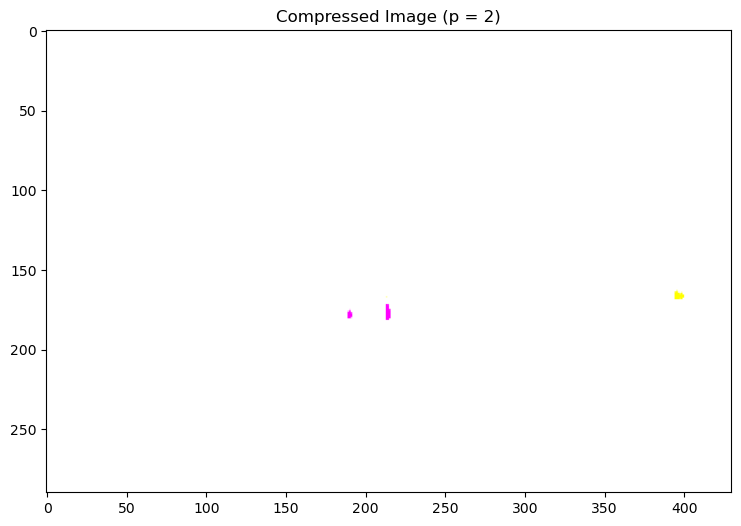

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Channel: Red
Percent of storage memory for p=2 singular values: 1.16%
Relative error for p=2: 6539.28095
------------------------
Channel: Green
Percent of storage memory for p=2 singular values: 1.16%
Relative error for p=2: 6479.72489
------------------------
Channel: Blue
Percent of storage memory for p=2 singular values: 1.16%
Relative error for p=2: 13118.79364
------------------------


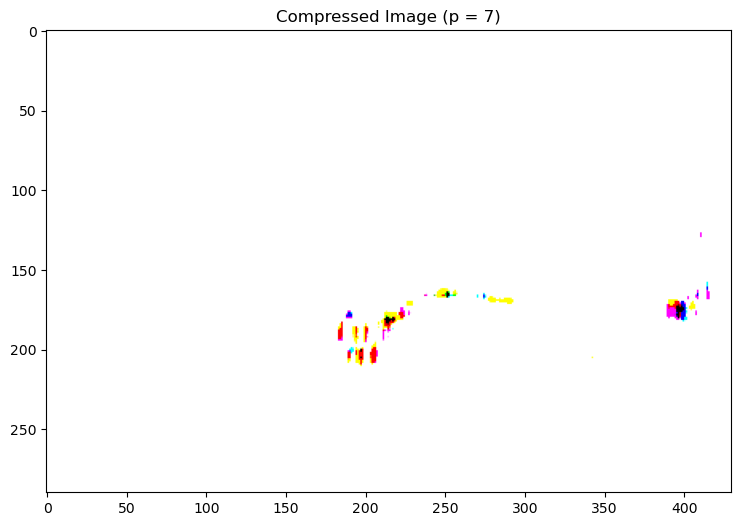

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Channel: Red
Percent of storage memory for p=7 singular values: 4.08%
Relative error for p=7: 4223.92851
------------------------
Channel: Green
Percent of storage memory for p=7 singular values: 4.08%
Relative error for p=7: 3950.66835
------------------------
Channel: Blue
Percent of storage memory for p=7 singular values: 4.08%
Relative error for p=7: 6386.77972
------------------------


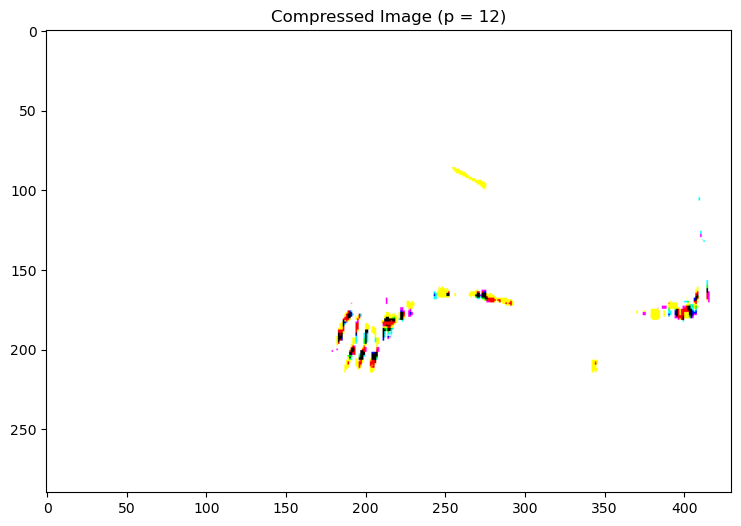

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Channel: Red
Percent of storage memory for p=12 singular values: 7.04%
Relative error for p=12: 3308.23933
------------------------
Channel: Green
Percent of storage memory for p=12 singular values: 7.04%
Relative error for p=12: 3090.67947
------------------------
Channel: Blue
Percent of storage memory for p=12 singular values: 7.04%
Relative error for p=12: 4367.70396
------------------------


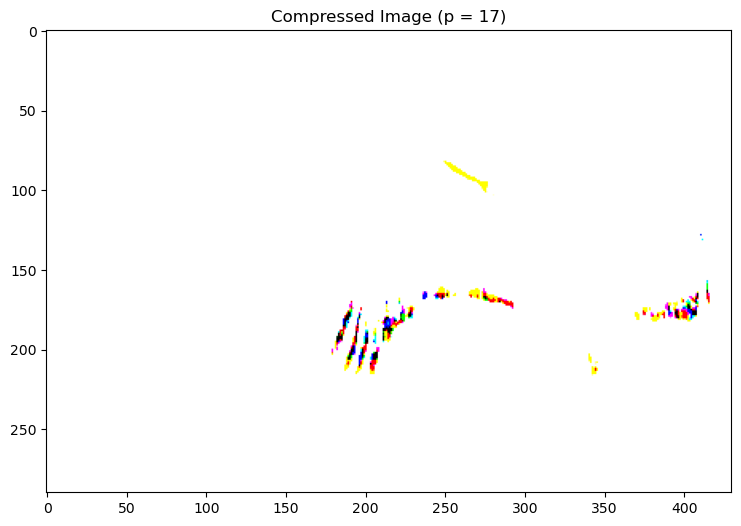

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Channel: Red
Percent of storage memory for p=17 singular values: 10.05%
Relative error for p=17: 2743.84772
------------------------
Channel: Green
Percent of storage memory for p=17 singular values: 10.05%
Relative error for p=17: 2544.49846
------------------------
Channel: Blue
Percent of storage memory for p=17 singular values: 10.05%
Relative error for p=17: 3434.39123
------------------------


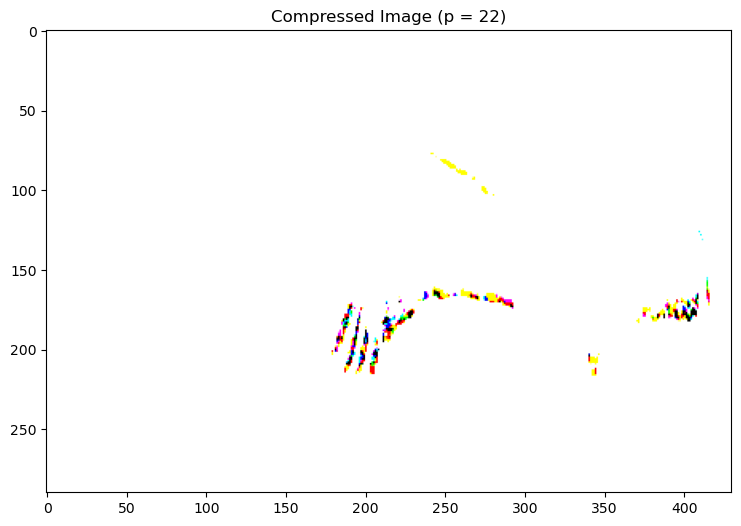

Channel: Red
Percent of storage memory for p=22 singular values: 13.09%
Relative error for p=22: 2344.28588
------------------------
Channel: Green
Percent of storage memory for p=22 singular values: 13.09%
Relative error for p=22: 2179.50556
------------------------
Channel: Blue
Percent of storage memory for p=22 singular values: 13.09%
Relative error for p=22: 2834.77827
------------------------


In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def compress_image_with_svd(image_path, p):
    # Load color image and convert it to NumPy array
    color_img = Image.open(image_path)

    color_img_array = np.array(color_img)

    # Apply SVD to each color channel separately
    compressed_channels = []
    storage_percentages = []
    errors = []

    for channel in range(3):  # Red, Green, Blue channels
        U, sigma, Vt = np.linalg.svd(
            color_img_array[:, :, channel], full_matrices=False)

        # Keep only the first p singular values
        U_p = U[:, :p]
        sigma_p = np.diag(sigma[:p])
        Vt_p = Vt[:p, :]

        # Compressed color channel
        compressed_channel = U_p @ sigma_p @ Vt_p
        compressed_channels.append(compressed_channel)

        # Calculate storage memory
        original_st = color_img_array[:, :, channel].size
        compressed_st = U_p.size + sigma_p.size + Vt_p.size

        # Calculate the percentage of storage memory used
        storage_percentage = compressed_st / original_st
        storage_percentages.append(storage_percentage)

        # Calculate the Frobenius norm as the error between original and reduced matrices
        error = np.linalg.norm(
            color_img_array[:, :, channel] - compressed_channel)
        errors.append(error)

    # Combine the compressed color channels
    compressed_image = np.stack(compressed_channels, axis=-1)

    return compressed_image, storage_percentages, errors


# Set the number of singular values to use (p)
# You can modify this list based on your requirements
p_values = [2, 7, 12, 17, 22]
image_path = "bird.png"
for p in p_values:
    compressed_img, storage_percentages, errors = compress_image_with_svd(
        image_path, p)

    # Display the compressed color image
    plt.figure(figsize=(9, 6))
    plt.imshow(compressed_img)
    title = "Compressed Image (p = {})".format(p)
    plt.title(title)
    plt.show()

    # Display information
    for channel, storage_percentage, error in zip(['Red', 'Green', 'Blue'], storage_percentages, errors):
        print('Channel: {}'.format(channel))
        print('Percent of storage memory for p={} singular values: {:.2%}'.format(
            p, storage_percentage))
        print('Relative error for p={}: {:.5f}'.format(p, error))
        print('------------------------')

Results for p = 2:
Channel: Red
Percent of storage memory: 1.16%
Relative error: 6539.28095
------------------------
Channel: Green
Percent of storage memory: 1.16%
Relative error: 6479.72489
------------------------
Channel: Blue
Percent of storage memory: 1.16%
Relative error: 13118.79364
------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


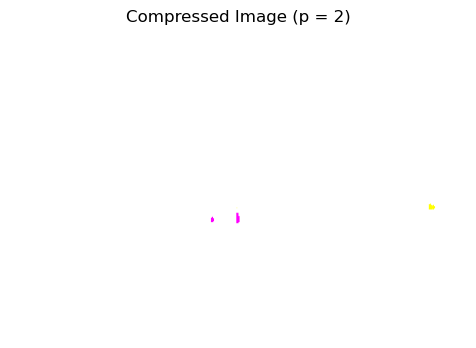

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Results for p = 7:
Channel: Red
Percent of storage memory: 4.08%
Relative error: 4223.92851
------------------------
Channel: Green
Percent of storage memory: 4.08%
Relative error: 3950.66835
------------------------
Channel: Blue
Percent of storage memory: 4.08%
Relative error: 6386.77972
------------------------


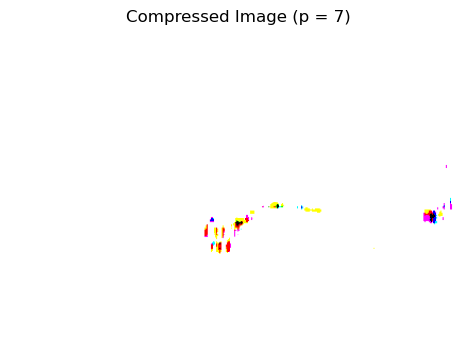

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Results for p = 12:
Channel: Red
Percent of storage memory: 7.04%
Relative error: 3308.23933
------------------------
Channel: Green
Percent of storage memory: 7.04%
Relative error: 3090.67947
------------------------
Channel: Blue
Percent of storage memory: 7.04%
Relative error: 4367.70396
------------------------


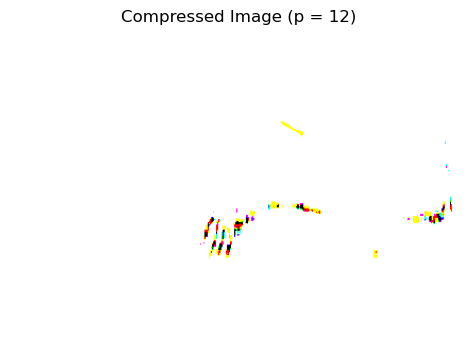

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Results for p = 17:
Channel: Red
Percent of storage memory: 10.05%
Relative error: 2743.84772
------------------------
Channel: Green
Percent of storage memory: 10.05%
Relative error: 2544.49846
------------------------
Channel: Blue
Percent of storage memory: 10.05%
Relative error: 3434.39123
------------------------


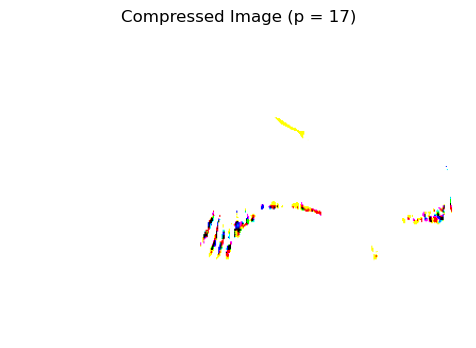

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Results for p = 22:
Channel: Red
Percent of storage memory: 13.09%
Relative error: 2344.28588
------------------------
Channel: Green
Percent of storage memory: 13.09%
Relative error: 2179.50556
------------------------
Channel: Blue
Percent of storage memory: 13.09%
Relative error: 2834.77827
------------------------


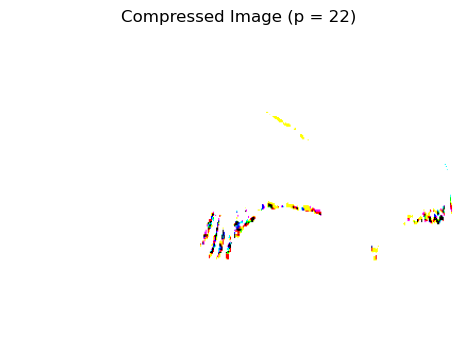

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def compress_image_with_svd(image_path, p):
    # Load color image and convert it to NumPy array
    color_img = Image.open(image_path)
    color_img_array = np.array(color_img)

    # Apply SVD to each color channel separately
    compressed_channels = []
    storage_percentages = []
    errors = []

    for channel in range(3):  # Red, Green, Blue channels
        U, sigma, Vt = np.linalg.svd(
            color_img_array[:, :, channel], full_matrices=False)

        # Keep only the first p singular values
        U_p = U[:, :p]
        sigma_p = np.diag(sigma[:p])
        Vt_p = Vt[:p, :]

        # Compressed color channel
        compressed_channel = U_p @ sigma_p @ Vt_p
        compressed_channels.append(compressed_channel)

        # Calculate storage memory
        original_st = color_img_array[:, :, channel].size
        compressed_st = U_p.size + sigma_p.size + Vt_p.size

        # Calculate the percentage of storage memory used
        storage_percentage = compressed_st / original_st
        storage_percentages.append(storage_percentage)

        # Calculate the Frobenius norm as the error between original and reduced matrices
        error = np.linalg.norm(
            color_img_array[:, :, channel] - compressed_channel)
        errors.append(error)

    # Combine the compressed color channels
    compressed_image = np.stack(compressed_channels, axis=-1)

    return compressed_image, storage_percentages, errors


# Set the number of singular values to use (p)
# You can modify this list based on your requirements
p_values = [2, 7, 12, 17, 22]
image_path = "bird.png"

# Plotting function for compressed images


def plot_compressed_image(compressed_img, p):
    plt.figure(figsize=(8, 4))
    plt.imshow(compressed_img)
    plt.title(f"Compressed Image (p = {p})")
    plt.axis('off')
    plt.show()


# Iterate through each p value
for p in p_values:
    compressed_img, storage_percentages, errors = compress_image_with_svd(
        image_path, p)

    print(f"Results for p = {p}:")

    # Display information for each channel
    for channel, storage_percentage, error in zip(['Red', 'Green', 'Blue'], storage_percentages, errors):
        print(f'Channel: {channel}')
        print(f'Percent of storage memory: {storage_percentage:.2%}')
        print(f'Relative error: {error:.5f}')
        print('------------------------')

    # Display compressed image
    plot_compressed_image(compressed_img, p)

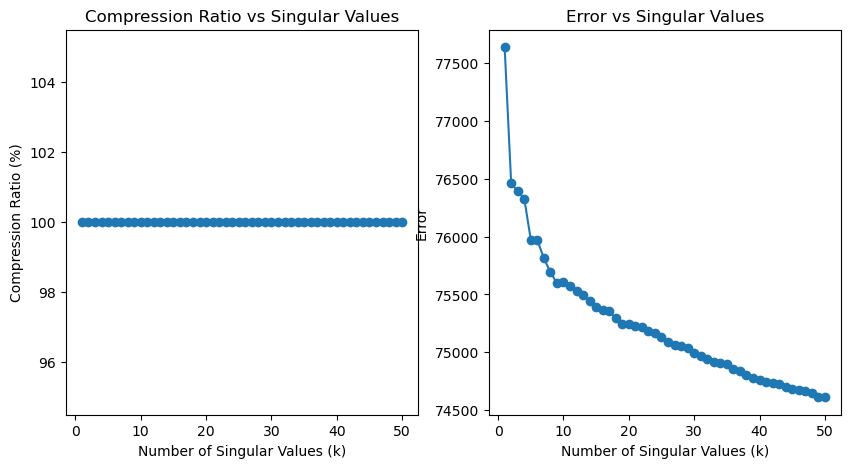

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def compress_color_image(image_path, k):
    # Load color image and convert it to NumPy array
    color_img = Image.open(image_path)
    color_img_array = np.array(color_img)

    # Apply SVD to each color channel separately
    compressed_channels = []

    for channel in range(3):  # Red, Green, Blue channels
        U, sigma, Vt = np.linalg.svd(
            color_img_array[:, :, channel], full_matrices=False)

        # Keep only the first k singular values
        U_k = U[:, :k]
        sigma_k = np.diag(sigma[:k])
        Vt_k = Vt[:k, :]

        # Compressed color channel
        compressed_channel = U_k @ sigma_k @ Vt_k
        compressed_channels.append(compressed_channel)

    # Combine the compressed color channels
    compressed_image = np.stack(compressed_channels, axis=-1)

    # Ensure pixel values are in the valid range [0, 255]
    compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)

    return compressed_image


def compression_analysis(image_path, max_k):
    original_image = cv2.imread(image_path)

    # Initialize arrays to store compression ratios and errors
    compression_ratios = []
    errors = []

    for k in range(1, max_k + 1):
        compressed_image = compress_color_image(image_path, k)

        # Ensure the original and compressed images have the same shape
        original_image_resized = cv2.resize(
            original_image, (compressed_image.shape[1], compressed_image.shape[0]))

        # Convert images to grayscale
        original_gray = cv2.cvtColor(
            original_image_resized, cv2.COLOR_BGR2GRAY)
        compressed_gray = cv2.cvtColor(compressed_image, cv2.COLOR_BGR2GRAY)

        # Storage memory analysis
        original_size = original_gray.nbytes
        compressed_size = compressed_gray.nbytes
        compression_ratio = compressed_size / original_size * 100
        compression_ratios.append(compression_ratio)

        # Error calculation
        error = np.linalg.norm(original_gray - compressed_gray, 'fro')
        errors.append(error)

    # Plot the results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_k + 1), compression_ratios, marker='o')
    plt.title('Compression Ratio vs Singular Values')
    plt.xlabel('Number of Singular Values (k)')
    plt.ylabel('Compression Ratio (%)')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_k + 1), errors, marker='o')
    plt.title('Error vs Singular Values')
    plt.xlabel('Number of Singular Values (k)')
    plt.ylabel('Error')

    plt.show()


# Example usage
image_path = 'bird.png'
max_k = 50

compression_analysis(image_path, max_k)

1. **Percentage of Storage Memory Used for p Singular Values vs. Original Picture**:
    - We'll use the Singular Value Decomposition (SVD) to compress the image.
    - For various values of **p**, we'll calculate the percentage of storage memory used by the reduced matrix **Ap** (constructed using the first **p** singular values) compared to the original image matrix **A**.
    - The percentage can be computed as:
        $$\text{Percentage} = \frac{\text{Storage Memory of } Ap}{\text{Storage Memory of } A} \times 100\%$$

2. **Error Between Original Image Matrix A and Reduced Matrix Ap**:
    - We'll measure the error between the original image matrix **A** and the reduced matrix **Ap** using a suitable metric (e.g., Frobenius norm or Mean Squared Error).
    - The error can be calculated as:
        $$\text{Error} = \|A - Ap\|$$